In [1038]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [1039]:
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_similarity_dif.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
dataframe

,CLASS,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,...,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf,dif
0,entailment,28.645093,1.631951,9.032564,0.000000,6.144412,0.127508,0.000000,0.00000,4.677207,...,0,0,0,0,0,0,0,0,0,-5
1,entailment,26.671300,3.984223,4.437697,0.000000,2.492923,8.615627,0.000000,0.00000,9.887845,...,0,0,0,0,0,0,0,0,0,-11
2,contradiction,14.880619,1.824592,3.687874,0.000000,5.383794,1.300978,3.665578,0.00000,1.199861,...,0,0,0,0,0,0,0,0,0,-4
3,contradiction,7.112267,0.000000,4.998954,0.000000,3.913144,0.000000,0.000000,0.00000,4.153236,...,0,0,0,0,0,0,0,0,0,-11
4,neutral,14.623623,0.000000,1.083491,0.000000,1.657801,0.000000,0.000000,0.00000,3.077783,...,2,0,1,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,22.531673,4.194771,1.396518,1.896350,0.000000,5.424360,1.283683,0.00000,3.104924,...,0,0,0,0,0,0,0,0,0,2
96,entailment,11.299096,0.000000,0.397504,0.000000,5.716955,0.000000,0.512868,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,2
97,contradiction,6.672148,0.000000,5.138863,0.000000,0.000000,0.000000,0.000000,0.00000,3.334945,...,0,0,0,0,0,0,0,0,0,-3
98,contradiction,7.110450,0.000000,0.658881,0.000000,0.000000,0.000000,0.000000,0.00000,2.450452,...,0,0,0,0,0,0,0,0,0,-9


In [1040]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf,dif
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000
mean,18.000084,1.966909,3.329762,0.714661,4.027800,1.670292,0.708723,0.286763,3.231024,0.323173,...,0.35000,0.160000,0.270000,0.090000,0.0,0.0,0.0,0.0,0.0,-2.470000
std,13.066107,3.663051,3.705304,1.865683,5.916808,3.708663,1.476073,1.224743,3.755477,0.811359,...,1.14922,0.677488,1.052702,0.668105,0.0,0.0,0.0,0.0,0.0,10.370369
min,0.916115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-66.000000
25%,9.314418,0.000000,0.325808,0.000000,0.000000,0.000000,0.000000,0.000000,1.096962,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-6.250000
50%,14.530209,0.000000,2.048562,0.000000,2.046613,0.000000,0.000000,0.000000,2.370600,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-2.000000
75%,22.358584,2.639672,5.007361,0.000000,5.493229,0.862745,0.984578,0.000000,3.736365,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
max,72.258189,19.695068,19.075915,8.491863,35.697347,20.094136,8.336549,9.572460,20.975957,5.915599,...,7.00000,5.000000,9.000000,6.000000,0.0,0.0,0.0,0.0,0.0,34.000000


In [1041]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


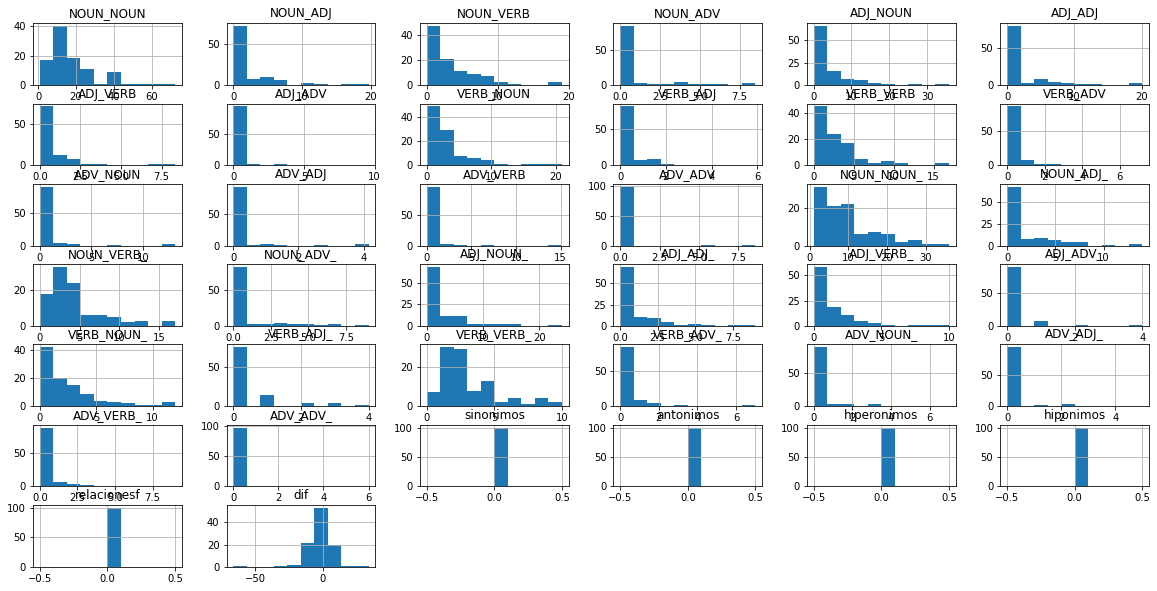

In [1042]:
dataframe.hist(figsize=(20,10))
plt.show()

In [1043]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [1044]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [1045]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_100621/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_100621/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 38)

In [1046]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1047]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1048]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [1049]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1050]:
model.decision_function(X)

array([[-1.52758941e-01,  4.14560101e-01, -2.61801159e-01],
       [-8.33936410e-01,  8.12473669e-01,  2.14627413e-02],
       [-1.06754410e-01,  6.43685121e-01, -5.36930710e-01],
       [ 1.60771668e-01,  3.12655146e-01, -4.73426814e-01],
       [-4.49619659e-02,  3.56218716e-02,  9.34009428e-03],
       [ 4.09717525e-01, -4.02235197e-01, -7.48232781e-03],
       [-1.47182377e-01,  4.47784791e-01, -3.00602414e-01],
       [-2.61390858e-01,  1.28253381e+00, -1.02114295e+00],
       [ 3.87419139e-01, -3.99752546e-01,  1.23334069e-02],
       [-9.37321102e-02,  1.22872459e+00, -1.13499248e+00],
       [-2.25639346e+00,  7.78826213e-01,  1.47756725e+00],
       [-2.89428862e-01,  6.14079739e-01, -3.24650877e-01],
       [-1.06856883e+00,  9.66520839e-01,  1.02047992e-01],
       [ 1.30045411e+00,  6.17209588e-01, -1.91766369e+00],
       [-1.67028349e+00,  3.82622445e-01,  1.28766105e+00],
       [-7.79738118e-02,  3.62551793e-01, -2.84577981e-01],
       [-2.48149123e+00,  2.46726309e+00

In [1051]:
labels=dataframe.columns[1:]

In [1052]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [1053]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [1054]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  24 VERB_NOUN_ 22 ADJ_VERB_
Entailment  7 ADJ_ADV 21 ADJ_ADJ_
Neutral  30 ADV_VERB_ 3 NOUN_ADV


In [1055]:
n_columns=dataframe.shape[1]-1

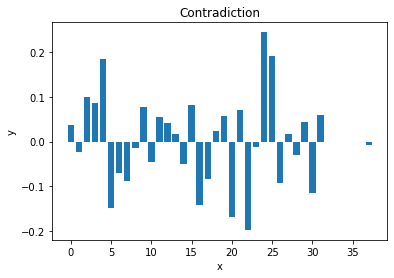

In [1056]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

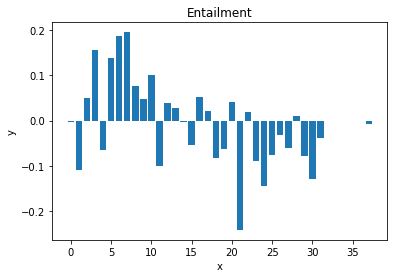

In [1057]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

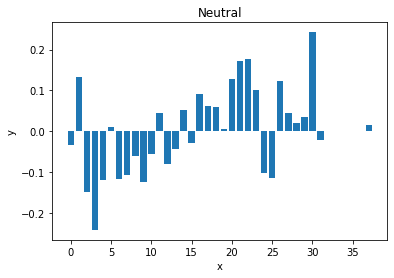

In [1058]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [1059]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'contradiction' 'entailment'
 'neutral' 'entailment' 'entailment' 'contradiction' 'neutral'
 'entailment' 'entailment' 'contradiction' 'entailment' 'contradiction'
 'entailment' 'entailment' 'neutral' 'contradiction' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'contradiction' 'neutral'
 'neutral' 'entailment' 'neutral' 'neutral' 'neutral' 'neutral'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral' 'neutral'
 'entailment' 'neutral' 'contradiction' 'contradiction' 'neutral'
 'neutral' 'entailment' 'entailment' '

In [1060]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1061]:
X

array([[ 28.64509261,   1.63195105,   9.03256369, ...,   0.        ,
          0.        ,  -5.        ],
       [ 26.67130001,   3.98422295,   4.43769664, ...,   0.        ,
          0.        , -11.        ],
       [ 14.88061917,   1.82459164,   3.68787432, ...,   0.        ,
          0.        ,  -4.        ],
       ...,
       [  6.67214802,   0.        ,   5.13886273, ...,   0.        ,
          0.        ,  -3.        ],
       [  7.11044979,   0.        ,   0.6588807 , ...,   0.        ,
          0.        ,  -9.        ],
       [ 13.31903434,   0.        ,   0.19219354, ...,   0.        ,
          0.        ,  -1.        ]])

In [1062]:
model.score(X,y)

0.66

In [1063]:
print(confusion_matrix(y, predictions))

[[13  8  6]
 [ 3 35  4]
 [ 2 11 18]]


In [1064]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [1065]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Logistic Regression: 0.412500 (0.276981)


/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [1066]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5


In [1067]:
print(confusion_matrix(Y_validation, predictions))

[[1 2 2]
 [0 6 0]
 [1 5 3]]


In [1068]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.50      0.20      0.29         5
   entailment       0.46      1.00      0.63         6
      neutral       0.60      0.33      0.43         9

     accuracy                           0.50        20
    macro avg       0.52      0.51      0.45        20
 weighted avg       0.53      0.50      0.45        20



In [1069]:
#X_new = pd.DataFrame()
#model.predict(X_new)